# Dashboard KPIs

This dashboard was constructed with the purpose of creating a csv file with the KPIs for the front end. It is mostly done with the use of pandas and numpy arrays.  

Some plots were made at the end of the notebook in order to understand a little bit better the data and to check if the calculations were correct. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from scipy import stats
from scipy.stats.mstats import gmean

## KPIs by municipality

In [2]:
dengue_weekly = pd.read_csv('dengue_weekly_2007_2020.csv')
dengue_weekly

,FECHA,ANO,SEMANA,COD_MUNICIPIO,COD_DPTO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE
0,2006-01-01,2006,1,91000,91,0,0,0
1,2006-01-08,2006,2,91000,91,0,0,0
2,2006-01-15,2006,3,91000,91,0,0,0
3,2006-01-22,2006,4,91000,91,0,0,0
4,2006-01-29,2006,5,91000,91,0,0,0
...,...,...,...,...,...,...,...,...
855339,2020-12-06,2020,50,99624,99,0,0,0
855340,2020-12-13,2020,51,99624,99,0,0,0
855341,2020-12-20,2020,52,99624,99,0,0,0
855342,2020-12-27,2020,53,99624,99,0,0,0


As all our KPIs are made to be presented by year, it is important to aggregate the data. As it is shown below:

In [3]:
dengue_yearly = dengue_weekly.groupby(['ANO', 'COD_MUNICIPIO'])[['DENGUE', 'DENGUE GRAVE', 'MORTALIDAD POR DENGUE']]\
.sum().reset_index()
dengue_yearly

,ANO,COD_MUNICIPIO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE
0,2006,5000,0,0,0
1,2006,5001,0,0,0
2,2006,5002,0,0,0
3,2006,5004,0,0,0
4,2006,5021,0,0,0
...,...,...,...,...,...
17451,2021,99000,0,0,0
17452,2021,99001,0,0,0
17453,2021,99524,0,0,0
17454,2021,99624,0,0,0


The population data comes from a different database that the Dengue data. In this order of ideas, we have to join both datasets.

In [4]:
poblacion_municipal = pd.read_csv('Población_Municipal_area_1985-2020.csv')
poblacion_municipal

,DANEMUN,DANEDPTO,DPTO,DANEMUN.1,MUNICIPIO,1985,1986,1987,1988,1989,...,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2
0,5001,5,Antioquia,5001,Medellín,1535955,1565394,1595095,1625321,1656333,...,32714,31877,31092,30358,29675,29043,28462,27933,27456,27029
1,5002,5,Antioquia,5002,Abejorral,26049,25813,25575,25331,25071,...,13179,13030,12891,12746,12609,12471,12331,12189,12047,11914
2,5004,5,Antioquia,5004,Abriaquí,3067,3098,3127,3156,3179,...,1536,1502,1455,1411,1377,1337,1295,1261,1223,1190
3,5021,5,Antioquia,5021,Alejandría,4909,4903,4895,4886,4872,...,1781,1745,1726,1684,1654,1627,1589,1560,1508,1481
4,5030,5,Antioquia,5030,Amagá,21984,22313,22644,22974,23296,...,12837,12821,12805,12799,12798,12797,12806,12811,12825,12831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,99001,99,Vichada,99001,Puerto Carreño,9695,10083,10494,10920,11357,...,2702,2645,2599,2562,2536,2520,2514,2518,2532,2557
1119,99524,99,Vichada,99524,La Primavera,4614,4776,4950,5133,5311,...,6342,6457,6578,6706,6840,6981,7128,7282,7442,7608
1120,99624,99,Vichada,99624,Santa Rosalía,1536,1591,1646,1709,1769,...,1391,1391,1391,1391,1390,1389,1388,1387,1386,1384
1121,99773,99,Vichada,99773,Cumaribo,9889,10239,10614,11005,11411,...,27689,28258,28837,29426,30027,30630,31250,31889,32550,33236


In [5]:
pob_mun = poblacion_municipal.loc[:,('DANEMUN', 'DANEDPTO', 'DPTO', 'MUNICIPIO', '2007', '2008', '2009', '2010', 
                                     '2011', '2012', '2013','2014','2015','2016','2017','2018', '2019', '2020')]
pob_mun = pob_mun[:1122]
pob_mun.head()

,DANEMUN,DANEDPTO,DPTO,MUNICIPIO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,5001,5,Antioquia,Medellín,2265244,2291378,2317336,2343049,2368282,2393011,2417325,2441123,2464322,2486723,2508452,2529403,2549537,2569007
1,5002,5,Antioquia,Abejorral,20022,19930,19853,19750,19672,19570,19478,19382,19290,19195,19096,18991,18882,18779
2,5004,5,Antioquia,Abriaquí,2570,2504,2458,2397,2336,2290,2231,2175,2128,2075,2019,1971,1918,1870
3,5021,5,Antioquia,Alejandría,3747,3724,3688,3652,3618,3575,3550,3502,3466,3435,3393,3361,3307,3278
4,5030,5,Antioquia,Amagá,27709,27950,28192,28433,28664,28897,29117,29339,29555,29770,29980,30181,30376,30561


In [6]:
pob_mun_melt = pob_mun.melt(id_vars = ['DANEMUN', 'DANEDPTO', 'DPTO', 'MUNICIPIO'], value_vars = ['2007', '2008', '2009', '2010', 
                                     '2011', '2012', '2013','2014','2015','2016','2017','2018', '2019', '2020'])
pob_mun_melt.columns = ['DANEMUN', 'DANEDPTO', 'DPTO', 'MUNICIPIO', 'ANO', 'POBLACION']
pob_mun_melt.head()

,DANEMUN,DANEDPTO,DPTO,MUNICIPIO,ANO,POBLACION
0,5001,5,Antioquia,Medellín,2007,2265244
1,5002,5,Antioquia,Abejorral,2007,20022
2,5004,5,Antioquia,Abriaquí,2007,2570
3,5021,5,Antioquia,Alejandría,2007,3747
4,5030,5,Antioquia,Amagá,2007,27709


In [7]:
pob_mun_melt['ANO'] = pd.to_numeric(pob_mun_melt['ANO'])
pob_mun_melt.dtypes

DANEMUN       int64
DANEDPTO      int64
DPTO         object
MUNICIPIO    object
ANO           int64
POBLACION     int64
dtype: object

In [8]:
dengue_top_cities = pd.merge(dengue_yearly, pob_mun_melt, left_on = ['ANO', 'COD_MUNICIPIO'], right_on = ['ANO', 'DANEMUN'], 
                                 how = 'left')
# dengue_top_cities[dengue_top_cities['ANO'] == 2016]

The main KPIs that must be calculated are: Incidence, mortality rate and lethality.

In [9]:
dengue_top_cities['INCIDENCIA_DENGUE'] = (dengue_top_cities['DENGUE']*100000)/dengue_top_cities['POBLACION']
# dengue_top_cities[dengue_top_cities['ANO'] == 2016]

In [10]:
dengue_top_cities['INCIDENCIA_DENGUE_GRAVE'] = (dengue_top_cities['DENGUE GRAVE']*100000)/dengue_top_cities['POBLACION']
# dengue_top_cities[dengue_top_cities['ANO'] == 2016]

In [11]:
dengue_top_cities['MORTALIDAD (%)'] = (dengue_top_cities['MORTALIDAD POR DENGUE']/dengue_top_cities['POBLACION'])*100
# dengue_top_cities[dengue_top_cities['ANO'] == 2016]

In [12]:
dengue_top_cities.sort_values(['COD_MUNICIPIO', 'ANO'], inplace=True)
dengue_top_cities

,ANO,COD_MUNICIPIO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,DANEMUN,DANEDPTO,DPTO,MUNICIPIO,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,MORTALIDAD (%)
0,2006,5000,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,2007,5000,49,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,2008,5000,31,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,2009,5000,24,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4364,2010,5000,143,33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,2017,99773,16,0,0,99773.0,99.0,Vichada,Cumaribo,38634.0,41.414298,0.000000,0.0
14182,2018,99773,6,0,0,99773.0,99.0,Vichada,Cumaribo,39549.0,15.171054,0.000000,0.0
15273,2019,99773,38,1,0,99773.0,99.0,Vichada,Cumaribo,40490.0,93.850333,2.469746,0.0
16364,2020,99773,11,0,0,99773.0,99.0,Vichada,Cumaribo,41459.0,26.532237,0.000000,0.0


In [13]:
dengue_top_cities['PCT_DENGUE'] = (dengue_top_cities['DENGUE'].pct_change())*100
# dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'DENGUE', 'PCT_DENGUE']][40:60]

In [14]:
dengue_top_cities['TIPO_CRECIMIENTO_DENGUE'] = np.where(dengue_top_cities['PCT_DENGUE'] > 0, 'BAD', 'GOOD')
dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'DENGUE', 'PCT_DENGUE', 'TIPO_CRECIMIENTO_DENGUE']][40:60]

,COD_MUNICIPIO,ANO,DENGUE,PCT_DENGUE,TIPO_CRECIMIENTO_DENGUE
8730,5002,2014,0,NaN,GOOD
9821,5002,2015,2,inf,BAD
10912,5002,2016,5,150.0,BAD
12003,5002,2017,1,-80.0,GOOD
13094,5002,2018,2,100.0,BAD
14185,5002,2019,0,-100.0,GOOD
15276,5002,2020,1,inf,BAD
16367,5002,2021,0,-100.0,GOOD
3,5004,2006,0,NaN,GOOD
1094,5004,2007,0,NaN,GOOD


It is also important to calculate the percentual difference for each one of the KPIs with respect to the same period in the previous year. And a categorization is also made in order to give a better understanding of the KPI. 

In [15]:
dengue_top_cities['PCT_DENGUE_GRAVE'] = (dengue_top_cities['DENGUE GRAVE'].pct_change())*100
# dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE']][40:60]
dengue_top_cities['TIPO_CRECIMIENTO_DENGUE_GRAVE'] = np.where(dengue_top_cities['PCT_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')
# dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_DENGUE_GRAVE']][40:60]

In [16]:
dengue_top_cities['PCT_MUERTES'] = (dengue_top_cities['MORTALIDAD POR DENGUE'].pct_change())*100
# dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'DENGUE GRAVE', 'PCT_MUERTES']][40:60]
dengue_top_cities['TIPO_CRECIMIENTO_MORTALIDAD'] = np.where(dengue_top_cities['PCT_MUERTES'] > 0, 'BAD', 'GOOD')
# dengue_top_cities[['COD_MUNICIPIO', 'ANO', 'MORTALIDAD POR DENGUE', 'PCT_MUERTES', 'TIPO_CRECIMIENTO_MORTALIDAD']][40:60]

In [17]:
dengue_top_cities['PCT_INCIDENCIA_DENGUE'] = (dengue_top_cities['INCIDENCIA_DENGUE'].pct_change())*100
dengue_top_cities['TIPO_CRECIMIENTO_INC_DENGUE'] = np.where(dengue_top_cities['PCT_INCIDENCIA_DENGUE'] > 0, 'BAD', 'GOOD')

In [18]:
dengue_top_cities['PCT_INCIDENCIA_DENGUE_GRAVE'] = (dengue_top_cities['INCIDENCIA_DENGUE_GRAVE'].pct_change())*100
dengue_top_cities['TIPO_CRECIMIENTO_INC_DENGUE_GRAVE'] = np.where(dengue_top_cities['PCT_INCIDENCIA_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')

In [19]:
dengue_top_cities['PCT_MORTALIDAD_RATE'] = (dengue_top_cities['MORTALIDAD (%)'].pct_change())*100
dengue_top_cities['TIPO_CRECIMIENTO_MORTALIDAD_RATE'] = np.where(dengue_top_cities['PCT_MORTALIDAD_RATE'] > 0, 'BAD', 'GOOD')

In [20]:
dengue_top_cities['LETALIDAD'] = dengue_top_cities['MORTALIDAD POR DENGUE']*100/dengue_top_cities['DENGUE GRAVE']
dengue_top_cities['PCT_LETALIDAD'] = (dengue_top_cities['LETALIDAD'].pct_change())*100
dengue_top_cities['TIPO_CRECIMIENTO_LETALIDAD'] = np.where(dengue_top_cities['PCT_LETALIDAD'] > 0, 'BAD', 'GOOD')

In [21]:
dengue_top_cities.columns

Index(['ANO', 'COD_MUNICIPIO', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE', 'DANEMUN', 'DANEDPTO', 'DPTO', 'MUNICIPIO',
       'POBLACION', 'INCIDENCIA_DENGUE', 'INCIDENCIA_DENGUE_GRAVE',
       'MORTALIDAD (%)', 'PCT_DENGUE', 'TIPO_CRECIMIENTO_DENGUE',
       'PCT_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_DENGUE_GRAVE', 'PCT_MUERTES',
       'TIPO_CRECIMIENTO_MORTALIDAD', 'PCT_INCIDENCIA_DENGUE',
       'TIPO_CRECIMIENTO_INC_DENGUE', 'PCT_INCIDENCIA_DENGUE_GRAVE',
       'TIPO_CRECIMIENTO_INC_DENGUE_GRAVE', 'PCT_MORTALIDAD_RATE',
       'TIPO_CRECIMIENTO_MORTALIDAD_RATE', 'LETALIDAD', 'PCT_LETALIDAD',
       'TIPO_CRECIMIENTO_LETALIDAD'],
      dtype='object')

To check if all the calculations were correct, we filter the dataset by a single municipality.

In [22]:
dengue_top_cities[dengue_top_cities['COD_MUNICIPIO'] == 5001]

,ANO,COD_MUNICIPIO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,DANEMUN,DANEDPTO,DPTO,MUNICIPIO,POBLACION,...,TIPO_CRECIMIENTO_MORTALIDAD,PCT_INCIDENCIA_DENGUE,TIPO_CRECIMIENTO_INC_DENGUE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE,PCT_MORTALIDAD_RATE,TIPO_CRECIMIENTO_MORTALIDAD_RATE,LETALIDAD,PCT_LETALIDAD,TIPO_CRECIMIENTO_LETALIDAD
1,2006,5001,0,0,0,NaN,NaN,NaN,NaN,NaN,...,GOOD,NaN,GOOD,NaN,GOOD,NaN,GOOD,NaN,NaN,GOOD
1092,2007,5001,4,1,0,5001.0,5.0,Antioquia,Medellín,2265244.0,...,GOOD,NaN,GOOD,NaN,GOOD,NaN,GOOD,0.000000,NaN,GOOD
2183,2008,5001,888,20,0,5001.0,5.0,Antioquia,Medellín,2291378.0,...,GOOD,21846.800921,BAD,1877.189272,BAD,NaN,GOOD,0.000000,NaN,GOOD
3274,2009,5001,412,1,0,5001.0,5.0,Antioquia,Medellín,2317336.0,...,GOOD,-54.123320,GOOD,-95.056008,GOOD,NaN,GOOD,0.000000,NaN,GOOD
4365,2010,5001,15458,112,13,5001.0,5.0,Antioquia,Medellín,2343049.0,...,BAD,3610.767330,BAD,10977.089382,BAD,inf,BAD,11.607143,inf,BAD
5456,2011,5001,781,21,0,5001.0,5.0,Antioquia,Medellín,2368282.0,...,GOOD,-95.001431,GOOD,-81.449773,GOOD,-100.000000,GOOD,0.000000,-100.000000,GOOD
6547,2012,5001,701,12,0,5001.0,5.0,Antioquia,Medellín,2393011.0,...,GOOD,-11.170810,GOOD,-43.447648,GOOD,NaN,GOOD,0.000000,NaN,GOOD
7638,2013,5001,2297,45,0,5001.0,5.0,Antioquia,Medellín,2417325.0,...,GOOD,224.378924,BAD,271.228165,BAD,NaN,GOOD,0.000000,NaN,GOOD
8729,2014,5001,3223,50,0,5001.0,5.0,Antioquia,Medellín,2441123.0,...,GOOD,38.945566,BAD,10.027912,BAD,NaN,GOOD,0.000000,NaN,GOOD
9820,2015,5001,3748,37,3,5001.0,5.0,Antioquia,Medellín,2464322.0,...,BAD,15.194431,BAD,-26.696632,GOOD,inf,BAD,8.108108,inf,BAD


Line of code to save the resulting dataset in a csv file:

In [23]:
# dengue_top_cities.to_csv('dengue_top_cities.csv', encoding='iso-8859-1')

## KPIs by Department

The exact same procedure made in the previous section was made for the KPIs by department.

In [24]:
dengue_weekly.columns

Index(['FECHA', 'ANO', 'SEMANA', 'COD_MUNICIPIO', 'COD_DPTO', 'DENGUE',
       'DENGUE GRAVE', 'MORTALIDAD POR DENGUE'],
      dtype='object')

In [25]:
dengue_yearly_dpto = dengue_weekly.groupby(['ANO', 'COD_DPTO'])[['DENGUE', 'DENGUE GRAVE', 'MORTALIDAD POR DENGUE']]\
.sum().reset_index()
dengue_yearly_dpto

,ANO,COD_DPTO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE
0,2006,5,0,0,0
1,2006,8,0,0,0
2,2006,11,0,0,0
3,2006,13,0,0,0
4,2006,15,0,0,0
...,...,...,...,...,...
523,2021,91,0,0,0
524,2021,94,0,0,0
525,2021,95,0,0,0
526,2021,97,0,0,0


In [26]:
poblacion_municipal = pd.read_csv('Población_Municipal_area_1985-2020.csv')
poblacion_municipal

,DANEMUN,DANEDPTO,DPTO,DANEMUN.1,MUNICIPIO,1985,1986,1987,1988,1989,...,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2
0,5001,5,Antioquia,5001,Medellín,1535955,1565394,1595095,1625321,1656333,...,32714,31877,31092,30358,29675,29043,28462,27933,27456,27029
1,5002,5,Antioquia,5002,Abejorral,26049,25813,25575,25331,25071,...,13179,13030,12891,12746,12609,12471,12331,12189,12047,11914
2,5004,5,Antioquia,5004,Abriaquí,3067,3098,3127,3156,3179,...,1536,1502,1455,1411,1377,1337,1295,1261,1223,1190
3,5021,5,Antioquia,5021,Alejandría,4909,4903,4895,4886,4872,...,1781,1745,1726,1684,1654,1627,1589,1560,1508,1481
4,5030,5,Antioquia,5030,Amagá,21984,22313,22644,22974,23296,...,12837,12821,12805,12799,12798,12797,12806,12811,12825,12831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,99001,99,Vichada,99001,Puerto Carreño,9695,10083,10494,10920,11357,...,2702,2645,2599,2562,2536,2520,2514,2518,2532,2557
1119,99524,99,Vichada,99524,La Primavera,4614,4776,4950,5133,5311,...,6342,6457,6578,6706,6840,6981,7128,7282,7442,7608
1120,99624,99,Vichada,99624,Santa Rosalía,1536,1591,1646,1709,1769,...,1391,1391,1391,1391,1390,1389,1388,1387,1386,1384
1121,99773,99,Vichada,99773,Cumaribo,9889,10239,10614,11005,11411,...,27689,28258,28837,29426,30027,30630,31250,31889,32550,33236


In [27]:
pob_dep = poblacion_municipal.loc[:,('DANEDPTO', 'DPTO', '2007', '2008', '2009', '2010', 
                                     '2011', '2012', '2013','2014','2015','2016','2017','2018', '2019', '2020')]
pob_dep = pob_dep[:1122]
pob_dep.head()

,DANEDPTO,DPTO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,5,Antioquia,2265244,2291378,2317336,2343049,2368282,2393011,2417325,2441123,2464322,2486723,2508452,2529403,2549537,2569007
1,5,Antioquia,20022,19930,19853,19750,19672,19570,19478,19382,19290,19195,19096,18991,18882,18779
2,5,Antioquia,2570,2504,2458,2397,2336,2290,2231,2175,2128,2075,2019,1971,1918,1870
3,5,Antioquia,3747,3724,3688,3652,3618,3575,3550,3502,3466,3435,3393,3361,3307,3278
4,5,Antioquia,27709,27950,28192,28433,28664,28897,29117,29339,29555,29770,29980,30181,30376,30561


In [28]:
pob_dep_melt = pob_dep.melt(id_vars = ['DANEDPTO', 'DPTO'], value_vars = ['2007', '2008', '2009', '2010', 
                                     '2011', '2012', '2013','2014','2015','2016','2017','2018', '2019', '2020'])
pob_dep_melt.columns = ['DANEDPTO', 'DPTO', 'ANO', 'POBLACION']
pob_dep_melt.head()

,DANEDPTO,DPTO,ANO,POBLACION
0,5,Antioquia,2007,2265244
1,5,Antioquia,2007,20022
2,5,Antioquia,2007,2570
3,5,Antioquia,2007,3747
4,5,Antioquia,2007,27709


In [29]:
pob_dep_melt_gr = pd.DataFrame(pob_dep_melt.groupby(['DANEDPTO', 'DPTO', 'ANO'])['POBLACION'].sum()).reset_index()
pob_dep_melt_gr

,DANEDPTO,DPTO,ANO,POBLACION
0,5,Antioquia,2007,5834865
1,5,Antioquia,2008,5911399
2,5,Antioquia,2009,5988552
3,5,Antioquia,2010,6066003
4,5,Antioquia,2011,6143809
...,...,...,...,...
457,99,Vichada,2016,73702
458,99,Vichada,2017,75468
459,99,Vichada,2018,77276
460,99,Vichada,2019,79134


In [30]:
pob_dep_melt_gr['ANO'] = pd.to_numeric(pob_dep_melt_gr['ANO'])
pob_dep_melt_gr.dtypes

DANEDPTO      int64
DPTO         object
ANO           int64
POBLACION     int64
dtype: object

In [31]:
dengue_top_dpto = pd.merge(dengue_yearly_dpto, pob_dep_melt_gr, left_on = ['ANO', 'COD_DPTO'], right_on = ['ANO', 'DANEDPTO'], 
                                 how = 'left')
# dengue_top_dpto[dengue_top_dpto['ANO'] == 2016]

In [32]:
dengue_top_dpto['INCIDENCIA_DENGUE'] = (dengue_top_dpto['DENGUE']*100000)/dengue_top_dpto['POBLACION']
# dengue_top_dpto[dengue_top_dpto['ANO'] == 2016]

In [33]:
dengue_top_dpto['INCIDENCIA_DENGUE_GRAVE'] = (dengue_top_dpto['DENGUE GRAVE']*100000)/dengue_top_dpto['POBLACION']
# dengue_top_dpto[dengue_top_dpto['ANO'] == 2016]

In [34]:
dengue_top_dpto['MORTALIDAD (%)'] = (dengue_top_dpto['MORTALIDAD POR DENGUE']/dengue_top_dpto['POBLACION'])*100
# dengue_top_dpto[dengue_top_dpto['ANO'] == 2016]

In [35]:
dengue_top_dpto.sort_values(['COD_DPTO', 'ANO'], inplace=True)
# dengue_top_dpto

In [36]:
dengue_top_dpto['PCT_DENGUE'] = (dengue_top_dpto['DENGUE'].pct_change())*100
dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE', 'PCT_DENGUE']][40:60]

,COD_DPTO,ANO,DENGUE,PCT_DENGUE
266,11,2014,161,13.380282
299,11,2015,0,-100.000000
332,11,2016,0,NaN
365,11,2017,0,NaN
398,11,2018,0,NaN
431,11,2019,0,NaN
464,11,2020,0,NaN
497,11,2021,0,NaN
3,13,2006,0,NaN
36,13,2007,643,inf


In [37]:
dengue_top_dpto['TIPO_CRECIMIENTO_DENGUE'] = np.where(dengue_top_dpto['PCT_DENGUE'] > 0, 'BAD', 'GOOD')
# dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE', 'PCT_DENGUE', 'TIPO_CRECIMIENTO_DENGUE']][40:60]

In [38]:
dengue_top_dpto['PCT_DENGUE_GRAVE'] = (dengue_top_dpto['DENGUE GRAVE'].pct_change())*100
# dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE']][40:60]
dengue_top_dpto['TIPO_CRECIMIENTO_DENGUE_GRAVE'] = np.where(dengue_top_dpto['PCT_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')
# dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_DENGUE_GRAVE']][40:60]

In [39]:
dengue_top_dpto['PCT_MUERTES'] = (dengue_top_dpto['MORTALIDAD POR DENGUE'].pct_change())*100
# dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE GRAVE', 'PCT_MUERTES']][40:60]
dengue_top_dpto['TIPO_CRECIMIENTO_MORTALIDAD'] = np.where(dengue_top_dpto['PCT_MUERTES'] > 0, 'BAD', 'GOOD')
# dengue_top_dpto[['COD_DPTO', 'ANO', 'MORTALIDAD POR DENGUE', 'PCT_MUERTES', 'TIPO_CRECIMIENTO_MORTALIDAD']][40:60]

In [40]:
dengue_top_dpto['PCT_INCIDENCIA_DENGUE'] = (dengue_top_dpto['INCIDENCIA_DENGUE'].pct_change())*100
dengue_top_dpto['TIPO_CRECIMIENTO_INC_DENGUE'] = np.where(dengue_top_dpto['PCT_INCIDENCIA_DENGUE'] > 0, 'BAD', 'GOOD')

In [41]:
dengue_top_dpto['PCT_INCIDENCIA_DENGUE_GRAVE'] = (dengue_top_dpto['INCIDENCIA_DENGUE_GRAVE'].pct_change())*100
dengue_top_dpto['TIPO_CRECIMIENTO_INC_DENGUE_GRAVE'] = np.where(dengue_top_dpto['PCT_INCIDENCIA_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')

In [42]:
dengue_top_dpto['PCT_MORTALIDAD_RATE'] = (dengue_top_dpto['MORTALIDAD (%)'].pct_change())*100
dengue_top_dpto['TIPO_CRECIMIENTO_MORTALIDAD_RATE'] = np.where(dengue_top_dpto['PCT_MORTALIDAD_RATE'] > 0, 'BAD', 'GOOD')

In [43]:
dengue_top_dpto['LETALIDAD'] = dengue_top_dpto['MORTALIDAD POR DENGUE']*100/dengue_top_dpto['DENGUE GRAVE']
dengue_top_dpto['PCT_LETALIDAD'] = (dengue_top_dpto['LETALIDAD'].pct_change())*100
dengue_top_dpto['TIPO_CRECIMIENTO_LETALIDAD'] = np.where(dengue_top_dpto['PCT_LETALIDAD'] > 0, 'BAD', 'GOOD')

In [44]:
dengue_top_dpto.columns

Index(['ANO', 'COD_DPTO', 'DENGUE', 'DENGUE GRAVE', 'MORTALIDAD POR DENGUE',
       'DANEDPTO', 'DPTO', 'POBLACION', 'INCIDENCIA_DENGUE',
       'INCIDENCIA_DENGUE_GRAVE', 'MORTALIDAD (%)', 'PCT_DENGUE',
       'TIPO_CRECIMIENTO_DENGUE', 'PCT_DENGUE_GRAVE',
       'TIPO_CRECIMIENTO_DENGUE_GRAVE', 'PCT_MUERTES',
       'TIPO_CRECIMIENTO_MORTALIDAD', 'PCT_INCIDENCIA_DENGUE',
       'TIPO_CRECIMIENTO_INC_DENGUE', 'PCT_INCIDENCIA_DENGUE_GRAVE',
       'TIPO_CRECIMIENTO_INC_DENGUE_GRAVE', 'PCT_MORTALIDAD_RATE',
       'TIPO_CRECIMIENTO_MORTALIDAD_RATE', 'LETALIDAD', 'PCT_LETALIDAD',
       'TIPO_CRECIMIENTO_LETALIDAD'],
      dtype='object')

In [45]:
dengue_top_dpto[dengue_top_dpto['COD_DPTO'] == 11]

,ANO,COD_DPTO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,DANEDPTO,DPTO,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,...,TIPO_CRECIMIENTO_MORTALIDAD,PCT_INCIDENCIA_DENGUE,TIPO_CRECIMIENTO_INC_DENGUE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE,PCT_MORTALIDAD_RATE,TIPO_CRECIMIENTO_MORTALIDAD_RATE,LETALIDAD,PCT_LETALIDAD,TIPO_CRECIMIENTO_LETALIDAD
2,2006,11,0,0,0,NaN,NaN,NaN,NaN,NaN,...,GOOD,0.000000,GOOD,0.00000,GOOD,0.000000,GOOD,NaN,0.0,GOOD
35,2007,11,0,0,1,11.0,"Bogotá, D.C.",7050228.0,0.000000,0.000000,...,BAD,-100.000000,GOOD,-100.00000,GOOD,-63.108938,GOOD,inf,inf,BAD
68,2008,11,1,0,0,11.0,"Bogotá, D.C.",7155052.0,0.013976,0.000000,...,GOOD,inf,BAD,NaN,GOOD,-100.000000,GOOD,NaN,NaN,GOOD
101,2009,11,0,0,0,11.0,"Bogotá, D.C.",7259597.0,0.000000,0.000000,...,GOOD,-100.000000,GOOD,NaN,GOOD,NaN,GOOD,NaN,NaN,GOOD
134,2010,11,0,0,0,11.0,"Bogotá, D.C.",7363782.0,0.000000,0.000000,...,GOOD,NaN,GOOD,NaN,GOOD,NaN,GOOD,NaN,NaN,GOOD
167,2011,11,0,0,0,11.0,"Bogotá, D.C.",7467804.0,0.000000,0.000000,...,GOOD,NaN,GOOD,NaN,GOOD,NaN,GOOD,NaN,NaN,GOOD
200,2012,11,62,0,0,11.0,"Bogotá, D.C.",7571345.0,0.818877,0.000000,...,GOOD,inf,BAD,NaN,GOOD,NaN,GOOD,NaN,NaN,GOOD
233,2013,11,142,6,0,11.0,"Bogotá, D.C.",7674366.0,1.850316,0.078182,...,GOOD,125.957720,BAD,inf,BAD,NaN,GOOD,0.0,-100.0,GOOD
266,2014,11,161,8,1,11.0,"Bogotá, D.C.",7776845.0,2.070248,0.102869,...,BAD,11.886218,BAD,31.57634,BAD,inf,BAD,12.5,inf,BAD
299,2015,11,0,0,0,11.0,"Bogotá, D.C.",7878783.0,0.000000,0.000000,...,GOOD,-100.000000,GOOD,-100.00000,GOOD,-100.000000,GOOD,NaN,0.0,GOOD


In [46]:
dengue_top_dpto[['COD_DPTO', 'ANO', 'DENGUE GRAVE', 'POBLACION','INCIDENCIA_DENGUE_GRAVE', 'PCT_INCIDENCIA_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_INC_DENGUE_GRAVE']][40:60]

,COD_DPTO,ANO,DENGUE GRAVE,POBLACION,INCIDENCIA_DENGUE_GRAVE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE
266,11,2014,8,7776845.0,0.102869,31.576340,BAD
299,11,2015,0,7878783.0,0.000000,-100.000000,GOOD
332,11,2016,0,7980001.0,0.000000,NaN,GOOD
365,11,2017,0,8080734.0,0.000000,NaN,GOOD
398,11,2018,0,8181047.0,0.000000,NaN,GOOD
431,11,2019,0,8281030.0,0.000000,NaN,GOOD
464,11,2020,0,8380801.0,0.000000,NaN,GOOD
497,11,2021,0,NaN,NaN,NaN,GOOD
3,13,2006,0,NaN,NaN,NaN,GOOD
36,13,2007,94,1917345.0,4.902613,inf,BAD


Line of code to save the resulting dataset in a csv file:

In [47]:
# dengue_top_dpto.to_csv('dengue_top_dpto.csv', encoding='iso-8859-1')

## KPIs for Colombia

It is necessary to compute the same KPIs by year, without any other level of detail, in case the user wants to see the data for the entire country, without filtering by department or municipality. 

In [48]:
dengue_yearly_col = dengue_weekly.groupby(['ANO'])[['DENGUE', 'DENGUE GRAVE', 'MORTALIDAD POR DENGUE']]\
.sum().reset_index()
dengue_yearly_col

,ANO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE
0,2006,0,0,0
1,2007,34843,6890,24
2,2008,32658,4266,20
3,2009,45233,7088,49
4,2010,146926,9698,280
5,2011,29039,1292,43
6,2012,52408,1409,88
7,2013,122297,3111,182
8,2014,105161,2612,166
9,2015,94947,1420,154


In [49]:
poblacion_municipal = pd.read_csv('Población_Municipal_area_1985-2020.csv')
poblacion_municipal

,DANEMUN,DANEDPTO,DPTO,DANEMUN.1,MUNICIPIO,1985,1986,1987,1988,1989,...,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2
0,5001,5,Antioquia,5001,Medellín,1535955,1565394,1595095,1625321,1656333,...,32714,31877,31092,30358,29675,29043,28462,27933,27456,27029
1,5002,5,Antioquia,5002,Abejorral,26049,25813,25575,25331,25071,...,13179,13030,12891,12746,12609,12471,12331,12189,12047,11914
2,5004,5,Antioquia,5004,Abriaquí,3067,3098,3127,3156,3179,...,1536,1502,1455,1411,1377,1337,1295,1261,1223,1190
3,5021,5,Antioquia,5021,Alejandría,4909,4903,4895,4886,4872,...,1781,1745,1726,1684,1654,1627,1589,1560,1508,1481
4,5030,5,Antioquia,5030,Amagá,21984,22313,22644,22974,23296,...,12837,12821,12805,12799,12798,12797,12806,12811,12825,12831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,99001,99,Vichada,99001,Puerto Carreño,9695,10083,10494,10920,11357,...,2702,2645,2599,2562,2536,2520,2514,2518,2532,2557
1119,99524,99,Vichada,99524,La Primavera,4614,4776,4950,5133,5311,...,6342,6457,6578,6706,6840,6981,7128,7282,7442,7608
1120,99624,99,Vichada,99624,Santa Rosalía,1536,1591,1646,1709,1769,...,1391,1391,1391,1391,1390,1389,1388,1387,1386,1384
1121,99773,99,Vichada,99773,Cumaribo,9889,10239,10614,11005,11411,...,27689,28258,28837,29426,30027,30630,31250,31889,32550,33236


In [50]:
pob_anual = poblacion_municipal.loc[:,('2007', '2008', '2009', '2010', 
                                     '2011', '2012', '2013','2014','2015','2016','2017','2018', '2019', '2020')]
pob_anual = pd.DataFrame(pob_anual.iloc[1122]).reset_index()
pob_anual

,index,1122
0,2007,43926929
1,2008,44451147
2,2009,44978832
3,2010,45509584
4,2011,46044601
5,2012,46581823
6,2013,47121089
7,2014,47661787
8,2015,48203405
9,2016,48747708


In [51]:
pob_anual.columns = ['ANO', 'POBLACION']

In [52]:
pob_anual['ANO'] = pd.to_numeric(pob_anual['ANO'])
pob_anual.dtypes

ANO          int64
POBLACION    int64
dtype: object

In [53]:
dengue_col = pd.merge(dengue_yearly_col, pob_anual, on = 'ANO', how = 'left')
# dengue_col[dengue_col['ANO'] == 2016]

In [54]:
dengue_col['INCIDENCIA_DENGUE'] = (dengue_col['DENGUE']*100000)/dengue_col['POBLACION']
# dengue_col[dengue_col['ANO'] == 2016]

In [55]:
dengue_col['INCIDENCIA_DENGUE_GRAVE'] = (dengue_col['DENGUE GRAVE']*100000)/dengue_col['POBLACION']
# dengue_col[dengue_col['ANO'] == 2016]

In [56]:
dengue_col['MORTALIDAD (%)'] = (dengue_col['MORTALIDAD POR DENGUE']/dengue_col['POBLACION'])*100
# dengue_col[dengue_col['ANO'] == 2016]

In [57]:
dengue_col.sort_values(['ANO'], inplace=True)
# dengue_col

In [58]:
dengue_col['PCT_DENGUE'] = (dengue_col['DENGUE'].pct_change())*100
dengue_col

,ANO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,MORTALIDAD (%),PCT_DENGUE
0,2006,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2007,34843,6890,24,43926929.0,79.320364,15.685139,0.000055,inf
2,2008,32658,4266,20,44451147.0,73.469420,9.597053,0.000045,-6.270987
3,2009,45233,7088,49,44978832.0,100.565084,15.758524,0.000109,38.505114
4,2010,146926,9698,280,45509584.0,322.846282,21.309797,0.000615,224.820375
5,2011,29039,1292,43,46044601.0,63.067112,2.805975,0.000093,-80.235629
6,2012,52408,1409,88,46581823.0,112.507404,3.024785,0.000189,80.474534
7,2013,122297,3111,182,47121089.0,259.537720,6.602139,0.000386,133.355595
8,2014,105161,2612,166,47661787.0,220.640070,5.480281,0.000348,-14.011791
9,2015,94947,1420,154,48203405.0,196.971562,2.945850,0.000319,-9.712726


In [59]:
dengue_col['TIPO_CRECIMIENTO_DENGUE'] = np.where(dengue_col['PCT_DENGUE'] > 0, 'BAD', 'GOOD')
# dengue_col[['ANO', 'DENGUE', 'PCT_DENGUE', 'TIPO_CRECIMIENTO_DENGUE']][40:60]

In [60]:
dengue_col['PCT_DENGUE_GRAVE'] = (dengue_col['DENGUE GRAVE'].pct_change())*100
# dengue_col[['ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE']][40:60]
dengue_col['TIPO_CRECIMIENTO_DENGUE_GRAVE'] = np.where(dengue_col['PCT_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')
# dengue_col[['ANO', 'DENGUE GRAVE', 'PCT_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_DENGUE_GRAVE']][40:60]

In [61]:
dengue_col['PCT_MUERTES'] = (dengue_col['MORTALIDAD POR DENGUE'].pct_change())*100
# dengue_col[[''ANO', 'DENGUE GRAVE', 'PCT_MUERTES']][40:60]
dengue_col['TIPO_CRECIMIENTO_MORTALIDAD'] = np.where(dengue_col['PCT_MUERTES'] > 0, 'BAD', 'GOOD')
# dengue_col[['ANO', 'MORTALIDAD POR DENGUE', 'PCT_MUERTES', 'TIPO_CRECIMIENTO_MORTALIDAD']][40:60]

In [62]:
dengue_col['PCT_INCIDENCIA_DENGUE'] = (dengue_col['INCIDENCIA_DENGUE'].pct_change())*100
dengue_col['TIPO_CRECIMIENTO_INC_DENGUE'] = np.where(dengue_col['PCT_INCIDENCIA_DENGUE'] > 0, 'BAD', 'GOOD')

In [63]:
dengue_col['PCT_INCIDENCIA_DENGUE_GRAVE'] = (dengue_col['INCIDENCIA_DENGUE_GRAVE'].pct_change())*100
dengue_col['TIPO_CRECIMIENTO_INC_DENGUE_GRAVE'] = np.where(dengue_col['PCT_INCIDENCIA_DENGUE_GRAVE'] > 0, 'BAD', 'GOOD')

In [64]:
dengue_col['PCT_MORTALIDAD_RATE'] = (dengue_col['MORTALIDAD (%)'].pct_change())*100
dengue_col['TIPO_CRECIMIENTO_MORTALIDAD_RATE'] = np.where(dengue_col['PCT_MORTALIDAD_RATE'] > 0, 'BAD', 'GOOD')

In [65]:
dengue_col['LETALIDAD'] = dengue_col['MORTALIDAD POR DENGUE']*100/dengue_col['DENGUE GRAVE']
dengue_col['PCT_LETALIDAD'] = (dengue_col['LETALIDAD'].pct_change())*100
dengue_col['TIPO_CRECIMIENTO_LETALIDAD'] = np.where(dengue_col['PCT_LETALIDAD'] > 0, 'BAD', 'GOOD')

In [66]:
dengue_col.columns

Index(['ANO', 'DENGUE', 'DENGUE GRAVE', 'MORTALIDAD POR DENGUE', 'POBLACION',
       'INCIDENCIA_DENGUE', 'INCIDENCIA_DENGUE_GRAVE', 'MORTALIDAD (%)',
       'PCT_DENGUE', 'TIPO_CRECIMIENTO_DENGUE', 'PCT_DENGUE_GRAVE',
       'TIPO_CRECIMIENTO_DENGUE_GRAVE', 'PCT_MUERTES',
       'TIPO_CRECIMIENTO_MORTALIDAD', 'PCT_INCIDENCIA_DENGUE',
       'TIPO_CRECIMIENTO_INC_DENGUE', 'PCT_INCIDENCIA_DENGUE_GRAVE',
       'TIPO_CRECIMIENTO_INC_DENGUE_GRAVE', 'PCT_MORTALIDAD_RATE',
       'TIPO_CRECIMIENTO_MORTALIDAD_RATE', 'LETALIDAD', 'PCT_LETALIDAD',
       'TIPO_CRECIMIENTO_LETALIDAD'],
      dtype='object')

In [67]:
dengue_col[dengue_col['ANO'] == 2011]

,ANO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,MORTALIDAD (%),PCT_DENGUE,TIPO_CRECIMIENTO_DENGUE,...,TIPO_CRECIMIENTO_MORTALIDAD,PCT_INCIDENCIA_DENGUE,TIPO_CRECIMIENTO_INC_DENGUE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE,PCT_MORTALIDAD_RATE,TIPO_CRECIMIENTO_MORTALIDAD_RATE,LETALIDAD,PCT_LETALIDAD,TIPO_CRECIMIENTO_LETALIDAD
5,2011,29039,1292,43,46044601.0,63.067112,2.805975,0.000093,-80.235629,GOOD,...,GOOD,-80.465282,GOOD,-86.832465,GOOD,-84.8213,GOOD,3.328173,15.273662,BAD


In [68]:
dengue_col[['ANO', 'DENGUE GRAVE', 'POBLACION','INCIDENCIA_DENGUE_GRAVE', 'PCT_INCIDENCIA_DENGUE_GRAVE', 'TIPO_CRECIMIENTO_INC_DENGUE_GRAVE']]

,ANO,DENGUE GRAVE,POBLACION,INCIDENCIA_DENGUE_GRAVE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE
0,2006,0,NaN,NaN,NaN,GOOD
1,2007,6890,43926929.0,15.685139,NaN,GOOD
2,2008,4266,44451147.0,9.597053,-38.814361,GOOD
3,2009,7088,44978832.0,15.758524,64.201703,BAD
4,2010,9698,45509584.0,21.309797,35.227114,BAD
5,2011,1292,46044601.0,2.805975,-86.832465,GOOD
6,2012,1409,46581823.0,3.024785,7.798002,BAD
7,2013,3111,47121089.0,6.602139,118.268056,BAD
8,2014,2612,47661787.0,5.480281,-16.992342,GOOD
9,2015,1420,48203405.0,2.945850,-46.246373,GOOD


Line of code to save the resulting dataset in a csv file:

In [69]:
# dengue_col.to_csv('dengue_col.csv', encoding='iso-8859-1')

## Understanding the data

We took advantage of the calculation of this KPIs in this document to gather some data for the final presentation. 

In [72]:
dengue_col[1:15]

,ANO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,MORTALIDAD (%),PCT_DENGUE,TIPO_CRECIMIENTO_DENGUE,...,TIPO_CRECIMIENTO_MORTALIDAD,PCT_INCIDENCIA_DENGUE,TIPO_CRECIMIENTO_INC_DENGUE,PCT_INCIDENCIA_DENGUE_GRAVE,TIPO_CRECIMIENTO_INC_DENGUE_GRAVE,PCT_MORTALIDAD_RATE,TIPO_CRECIMIENTO_MORTALIDAD_RATE,LETALIDAD,PCT_LETALIDAD,TIPO_CRECIMIENTO_LETALIDAD
1,2007,34843,6890,24,43926929.0,79.320364,15.685139,0.000055,inf,BAD,...,BAD,NaN,GOOD,NaN,GOOD,NaN,GOOD,0.348331,NaN,GOOD
2,2008,32658,4266,20,44451147.0,73.469420,9.597053,0.000045,-6.270987,GOOD,...,GOOD,-7.376345,GOOD,-38.814361,GOOD,-17.649427,GOOD,0.468823,34.591342,BAD
3,2009,45233,7088,49,44978832.0,100.565084,15.758524,0.000109,38.505114,BAD,...,BAD,36.880192,BAD,64.201703,BAD,142.125696,BAD,0.691309,47.456264,BAD
4,2010,146926,9698,280,45509584.0,322.846282,21.309797,0.000615,224.820375,BAD,...,BAD,221.032182,BAD,35.227114,BAD,464.764330,BAD,2.887193,317.641340,BAD
5,2011,29039,1292,43,46044601.0,63.067112,2.805975,0.000093,-80.235629,GOOD,...,GOOD,-80.465282,GOOD,-86.832465,GOOD,-84.821300,GOOD,3.328173,15.273662,BAD
6,2012,52408,1409,88,46581823.0,112.507404,3.024785,0.000189,80.474534,BAD,...,BAD,78.393145,BAD,7.798002,BAD,102.290948,BAD,6.245564,87.657418,BAD
7,2013,122297,3111,182,47121089.0,259.537720,6.602139,0.000386,133.355595,BAD,...,BAD,130.685012,BAD,118.268056,BAD,104.451301,BAD,5.850209,-6.330177,GOOD
8,2014,105161,2612,166,47661787.0,220.640070,5.480281,0.000348,-14.011791,GOOD,...,GOOD,-14.987282,GOOD,-16.992342,GOOD,-9.825925,GOOD,6.355283,8.633442,BAD
9,2015,94947,1420,154,48203405.0,196.971562,2.945850,0.000319,-9.712726,GOOD,...,GOOD,-10.727203,GOOD,-46.246373,GOOD,-8.271300,GOOD,10.845070,70.646530,BAD
10,2016,100042,898,125,48747708.0,205.224008,1.842138,0.000256,5.366152,BAD,...,GOOD,4.189663,BAD,-37.466677,GOOD,-19.737477,GOOD,13.919822,28.351604,BAD


In [71]:
dengue_col[1:15].describe()

,ANO,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,POBLACION,INCIDENCIA_DENGUE,INCIDENCIA_DENGUE_GRAVE,MORTALIDAD (%),PCT_DENGUE,PCT_DENGUE_GRAVE,PCT_MUERTES,PCT_INCIDENCIA_DENGUE,PCT_INCIDENCIA_DENGUE_GRAVE,PCT_MORTALIDAD_RATE,LETALIDAD,PCT_LETALIDAD
count,14.0000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,13.000000,14.000000,13.000000
mean,2013.5000,70685.428571,2937.571429,92.857143,4.740278e+07,148.857581,6.422201,0.000197,inf,inf,inf,34.906706,8.916428,55.350069,5.807083,39.376815
std,4.1833,41330.972923,2963.659866,78.544311,2.253063e+06,87.240458,6.644611,0.000170,NaN,NaN,NaN,94.060717,78.123166,152.629784,4.419342,93.983314
min,2007.0000,24999.000000,236.000000,15.000000,4.392693e+07,50.716543,0.478783,0.000029,-80.235629,-86.677665,-84.642857,-80.465282,-86.832465,-84.821300,0.348331,-55.827429
25%,2010.2500,36720.500000,982.250000,28.750000,4.564334e+07,80.287536,1.994513,0.000064,-12.937025,-43.747691,-18.290043,-14.987282,-46.246373,-19.737477,2.971847,-6.330177
50%,2013.5000,48820.500000,1414.500000,66.500000,4.739144e+07,106.536244,2.985317,0.000133,21.935633,-3.492066,0.291792,4.189663,-16.992342,-8.271300,5.718627,28.351604
75%,2016.7500,103881.250000,3977.250000,146.750000,4.915563e+07,216.786054,8.848324,0.000304,120.135329,102.342825,135.454545,78.393145,64.201703,104.451301,8.262550,47.456264
max,2020.0000,146926.000000,9698.000000,280.000000,5.091175e+07,322.846282,21.309797,0.000615,inf,inf,inf,221.032182,141.453620,464.764330,13.919822,317.641340


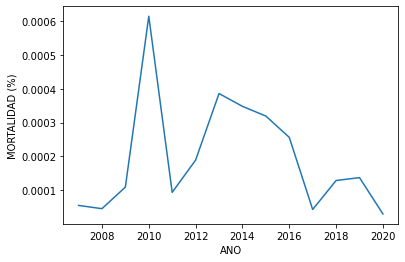

In [75]:
sns.lineplot(dengue_col['ANO'], dengue_col['MORTALIDAD (%)'], data=dengue_col)

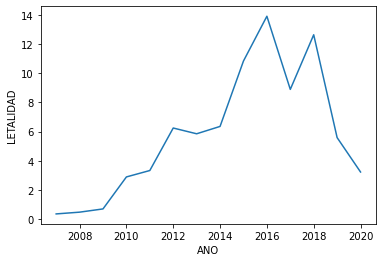

In [76]:
sns.lineplot(dengue_col['ANO'], dengue_col['LETALIDAD'], data=dengue_col)

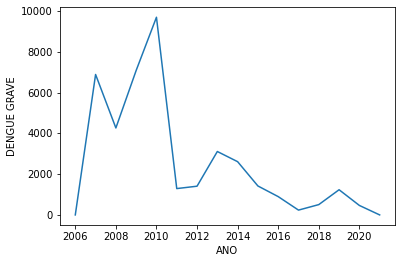

In [78]:
sns.lineplot(dengue_col['ANO'], dengue_col['DENGUE GRAVE'], data=dengue_col)

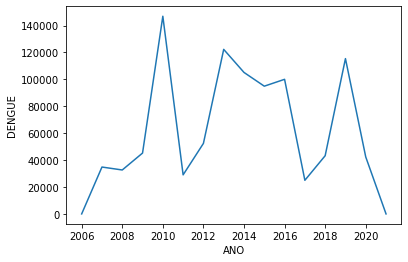

In [79]:
sns.lineplot(dengue_col['ANO'], dengue_col['DENGUE'], data=dengue_col)